1. Data Collection 

*   Mengumpulkan data diabetes



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from sklearn import svm
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# I read the dataset with pandas library
diabetes_dataset = pd.read_csv("diabetes.csv")

In [3]:
diabetes_dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes = pd.read_csv('diabetes.csv')

In [6]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

2. Data Cleaning

In [7]:
#Mencari duplikat data
diabetes.duplicated(keep=False).sum()

0

In [8]:
#mencari data null
def cek_null(df):
  col_na = df.isnull().sum().sort_values(ascending=False)
  percent = col_na / len(df)
  missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
  print(missing_data[missing_data['Total']>0])

In [9]:
cek_null(diabetes)

Empty DataFrame
Columns: [Total, Percent]
Index: []


Text(0, 0.5, 'Pedigree Function')

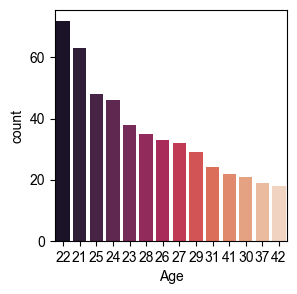

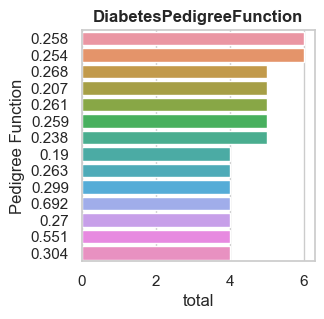

In [10]:
#Memvisualisasikan dataset
plt.figure(figsize=(3,3))
sns.countplot(x='Age', palette='rocket', data=diabetes, order=diabetes['Age'].value_counts().index[0:14])

plt.figure(figsize=(3,3))
sns.set(style='whitegrid')
sns.countplot(y='DiabetesPedigreeFunction', data=diabetes, order=diabetes['DiabetesPedigreeFunction'].value_counts().index[0:14])
plt.title('DiabetesPedigreeFunction', fontsize=12, fontweight='bold')
plt.xlabel('total')
plt.ylabel('Pedigree Function')

In [11]:
#memisahkan data
X = diabetes_dataset.drop(columns='Outcome', axis= 1)
Y = diabetes_dataset['Outcome']

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [14]:
#menstandarisasi data (scaler agar data seimbang atribut di seimbangkan)
Scaler = StandardScaler()

In [16]:
Scaler.fit(X) # yang di scaler X

StandardScaler()

In [17]:
Standarized_data = Scaler.transform(X)

In [18]:
print(Standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [19]:
print(X) #menampilkan skala dataset X
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Memisahkan Data Training dan Data Testing

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [22]:
#proses penggunaan algoritma svm
classifier = svm.SVC(kernel='linear')

In [23]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [24]:
#mengukur tingkat akurasi
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [25]:
print('Akurasi data training adalah=', training_data_accuracy)

Akurasi data training adalah= 0.7833876221498371


In [26]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('akurasi data testing adalah =', test_data_accuracy)

akurasi data testing adalah = 0.7727272727272727


In [28]:
#model prediksi melalui inputan data
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
std_data = Scaler.transform(input_data_reshape)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print('pasien terkena diabetes')
else:
    print('pasien tidak terkena diabetes')

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[0]
pasien terkena diabetes


Menyimpan data diabetes melalui file sav

In [29]:
import pickle

In [30]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename,'wb'))